In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
header = ['id_arc', 'node_from', 'node_to', 'id_arc_type', 'id_comuna', 'id_street'] + list(range(0, 48))

with open('../data/DAta-paDoris/arcos48_final.csv', 'r') as file:
    df = pd.read_csv(file, header=None, names=header)

In [3]:
print(df.iloc[0]['node_from'])

195558


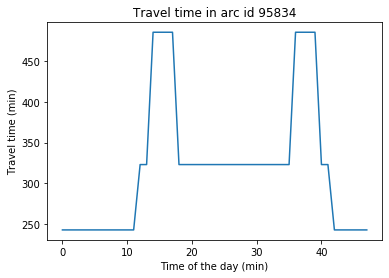

In [4]:
arc_id = 95834 # NO EXISTE!!
row = df.iloc[arc_id]

node_from = row[1]
node_to = row[2]
clase_id = row[3]
comuna_id = row[4]
calle_id = row[5]
travel_times = row[6:]
time_of_day = range(0, 48)

plt.plot(time_of_day, travel_times)
plt.xlabel('Time of the day (min)')
plt.ylabel('Travel time (min)')
plt.title('Travel time in arc id '+str(arc_id))
plt.show()

In [5]:
def get_travel_time_profile(df, node_from_or_arc, node_to=None):
    if node_to:
        for row_index, node_from in enumerate(df['node_from']):
            if node_from == node_from_or_arc and df.iloc[row_index]['node_to'] == node_to:
                row = df.iloc[row_index]
    else:
        for row_index, id_arc in enumerate(df['id_arc']):
            if id_arc == node_from_or_arc:
                row = df.iloc[row_index]
    info = {'id_arc': row['id_arc'], 'node_from': row['node_from'], 'node_to': row['node_to'], 
            'id_arc_type': row['id_arc_type'], 'id_comuna':row['id_comuna'], 'id_street': row['id_street']}
    return row[6:], range(0, 48), info

{'id_arc': 176656, 'node_from': 175142, 'node_to': 175530, 'id_arc_type': 2, 'id_comuna': 39, 'id_street': 17133}


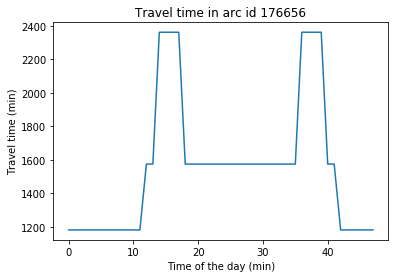

In [6]:
travel_times, times_of_day, info = get_travel_time_profile(df, 176656)

print(info)

plt.plot(time_of_day, travel_times)
plt.xlabel('Time of the day (min)')
plt.ylabel('Travel time (min)')
plt.title('Travel time in arc id '+str(info['id_arc']))
plt.show()

{'id_arc': 176656, 'node_from': 175142, 'node_to': 175530, 'id_arc_type': 2, 'id_comuna': 39, 'id_street': 17133}


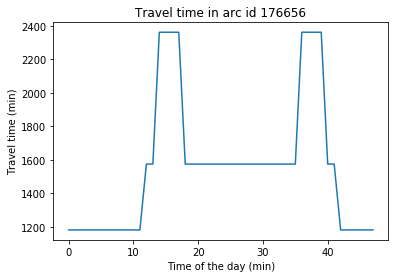

In [7]:
travel_times, times_of_day, info = get_travel_time_profile(df, 175142, 175530) # arc id 176656

print(info)

plt.plot(time_of_day, travel_times)
plt.xlabel('Time of the day (min)')
plt.ylabel('Travel time (min)')
plt.title('Travel time in arc id '+str(info['id_arc']))
plt.show()

### Turn travel times into flow
Based on: R. Akcelik, 1996, "Relating flow, density, speed and travel time models for uninterrupted and interrupted traffic"

<img src="../pictures/timeDistanceRelationship.png" style="width: 500px">

We suppose that all vehicles move at the same speed. This **speed** is $$v=\dfrac{L_h}{h}.$$ Similarly, $v=\dfrac{L_v}{t_v}$. Notice that $L_h = L_s+L_v$, thus $L_s=L_h-L_v$. These assumptions lead to $$t_g=h-t_v=h-\dfrac{L_v}{v}=\dfrac{L_s}{v}.$$

The vehicle length $L_v$ is easily obtained if all vehicles are the same. If there are more than one type of vehicle, $L_v$ can be calculated as the weighted average of the vehicle lenghts, according their proportions.

**Flow** is $$q=\dfrac{1}{h}$$
**Density** is $$k=\dfrac{1}{L_h}$$

The relationship among speed and flow is known as the fundamental realtionship in traffic flow theory: $$q=vk$$

